# 35. Reducción de dimensionalidad
1. t-SNE
2. UMAP
---
Autor: Pushkar G. Ghanekar


Adaptado por: Jonnatan Arias Garcia

jariasg@uniquindio.edu.co

jonnatan.arias@utp.edu.co

# t-SNE y UMAP - Efecto de la inicialización en la reducción de la dimensionalidad

Recreación del conjunto de datos explorado en la publicación [1] que analiza el efecto de las inicializaciones aleatorias y los submétodos en técnicas de reducción de dimensionalidad bien conocidas: la inicialización es fundamental para preservar la estructura de datos global tanto en t-SNE como en UMAP.

[[1] Initialization is critical for preserving global data structure in both t-SNE and UMAP](https://www.nature.com/articles/s41587-020-00809-z)

* Libreria usada para t-SNE: [opentsne](https://opentsne.readthedocs.io/en/latest/)
* Libreria usada para UMAP: [umap-learn](https://umap-learn.readthedocs.io/en/latest/)

## Conclusiones clave:
* Es difícil justificar el uso de t-SNE o UMAP en lugar de otro. No hay evidencia concluyente de que el algoritmo UMAP tenga alguna ventaja sobre t-SNE en términos de preservar la estructura global.

* Estos algoritmos deben usarse con cautela y con inicialización informativa por defecto.

* En todas los embeddings, las distancias entre grupos de puntos pueden carecer por completo de significado. A menudo es imposible representar topologías complejas en 2 dimensiones y los embeddings deben abordarse con sumo cuidado al intentar interpretar su diseño.

* La única certeza es la cercanía de los puntos y su similitud.

* Estos métodos no funcionan tan bien si la dimensionalidad intrínseca de los datos es superior a 2D.

* Los conjuntos de datos de alta dimensión suelen tener una dimensionalidad intrínseca más baja $ d << D$ sin embargo, d aún puede ser mayor que 2 y es posible que no siempre sea posible preservar fielmente estas distancias.

* Al utilizar tanto UMAP como t-SNE, se debe tener cuidado de no sobreinterpretar la estructura de incrustación o las distancias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns


In [2]:
!pip install openTSNE
!pip install umap-learn

In [3]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

import openTSNE
import umap

In [4]:
from openTSNE import TSNE

## 1. Miremos un circulo 2D  

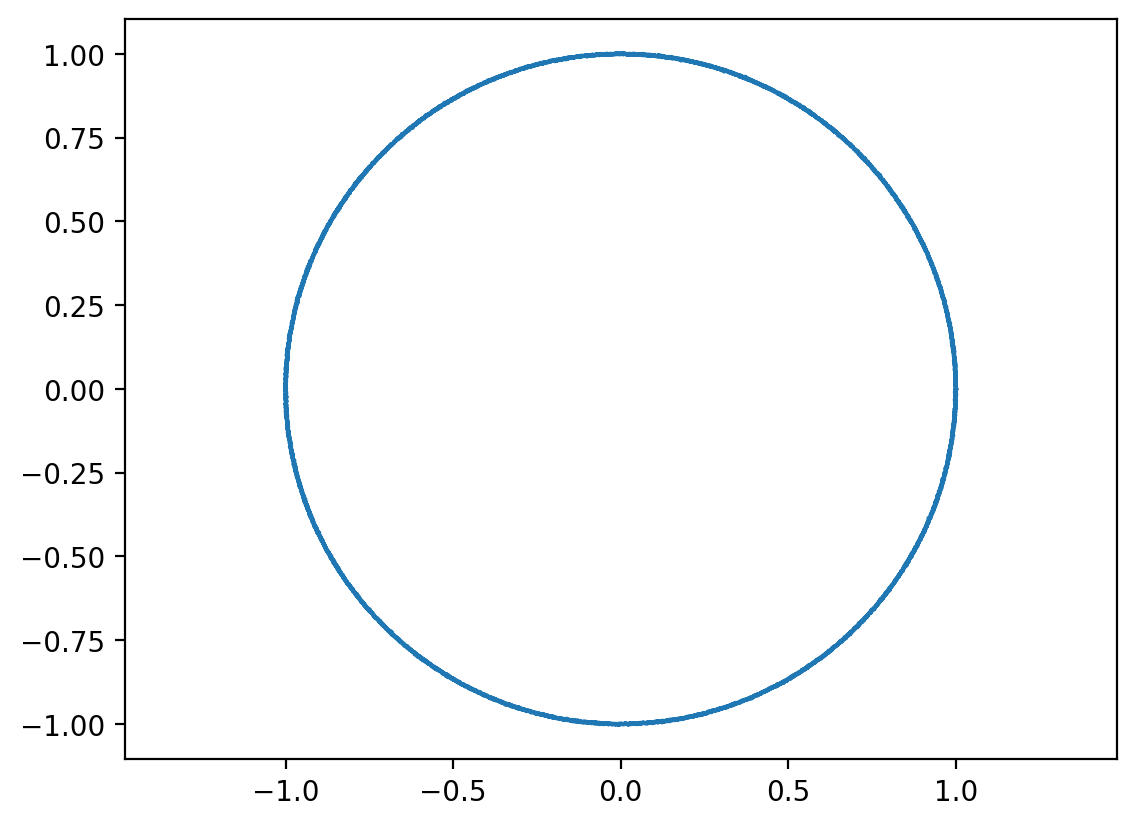

In [5]:
#Generate circle

n = 7000
np.random.seed(42)
X = np.random.randn(n, 3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

plt.plot(X[:,0], X[:,1]);
plt.axis('equal');

In [6]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 17min 22s, sys: 15min 41s, total: 33min 4s
Wall time: 18min 53s


In [9]:
%%time
from umap import UMAP
Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 5s, sys: 5.17 s, total: 1min 10s
Wall time: 1min 9s


In [10]:
%%time
from sklearn import decomposition
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 10.3 ms


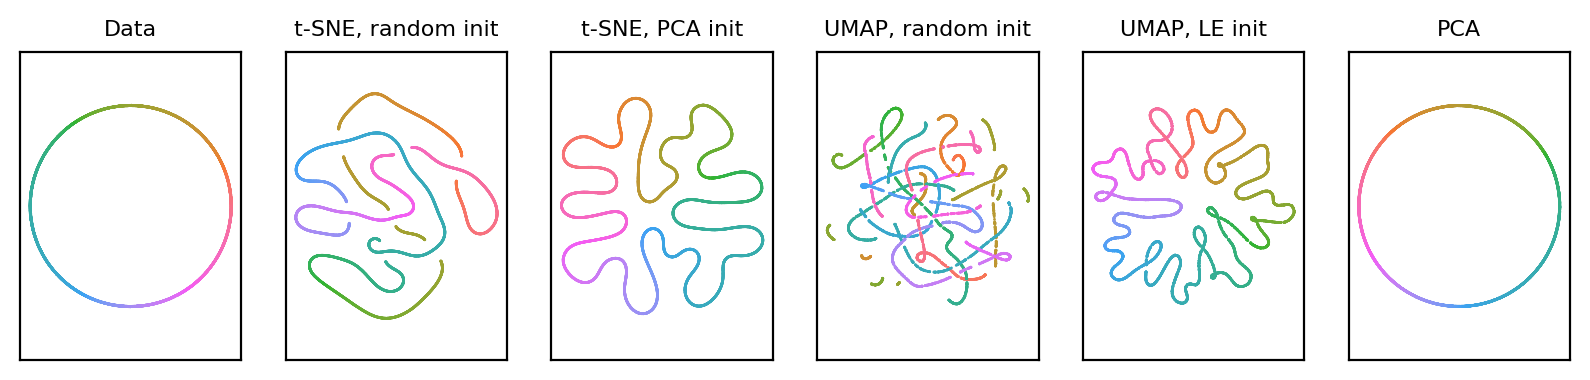

In [11]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init',
          'UMAP, random init', 'UMAP, LE init', 'PCA']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5],1):
    plt.subplot(1,6,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap,
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)

#sns.despine(left=True, bottom=True)

## 2. Mirando datos de dígitos escritos a mano

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

In [13]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
X = digits.data
Y = digits.target

In [15]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 4min 58s, sys: 4min 33s, total: 9min 31s
Wall time: 5min 23s


In [16]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 16.3 s, sys: 115 ms, total: 16.4 s
Wall time: 14.9 s


In [17]:
%%time

pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 32.2 ms, sys: 9.51 ms, total: 41.7 ms
Wall time: 24.8 ms


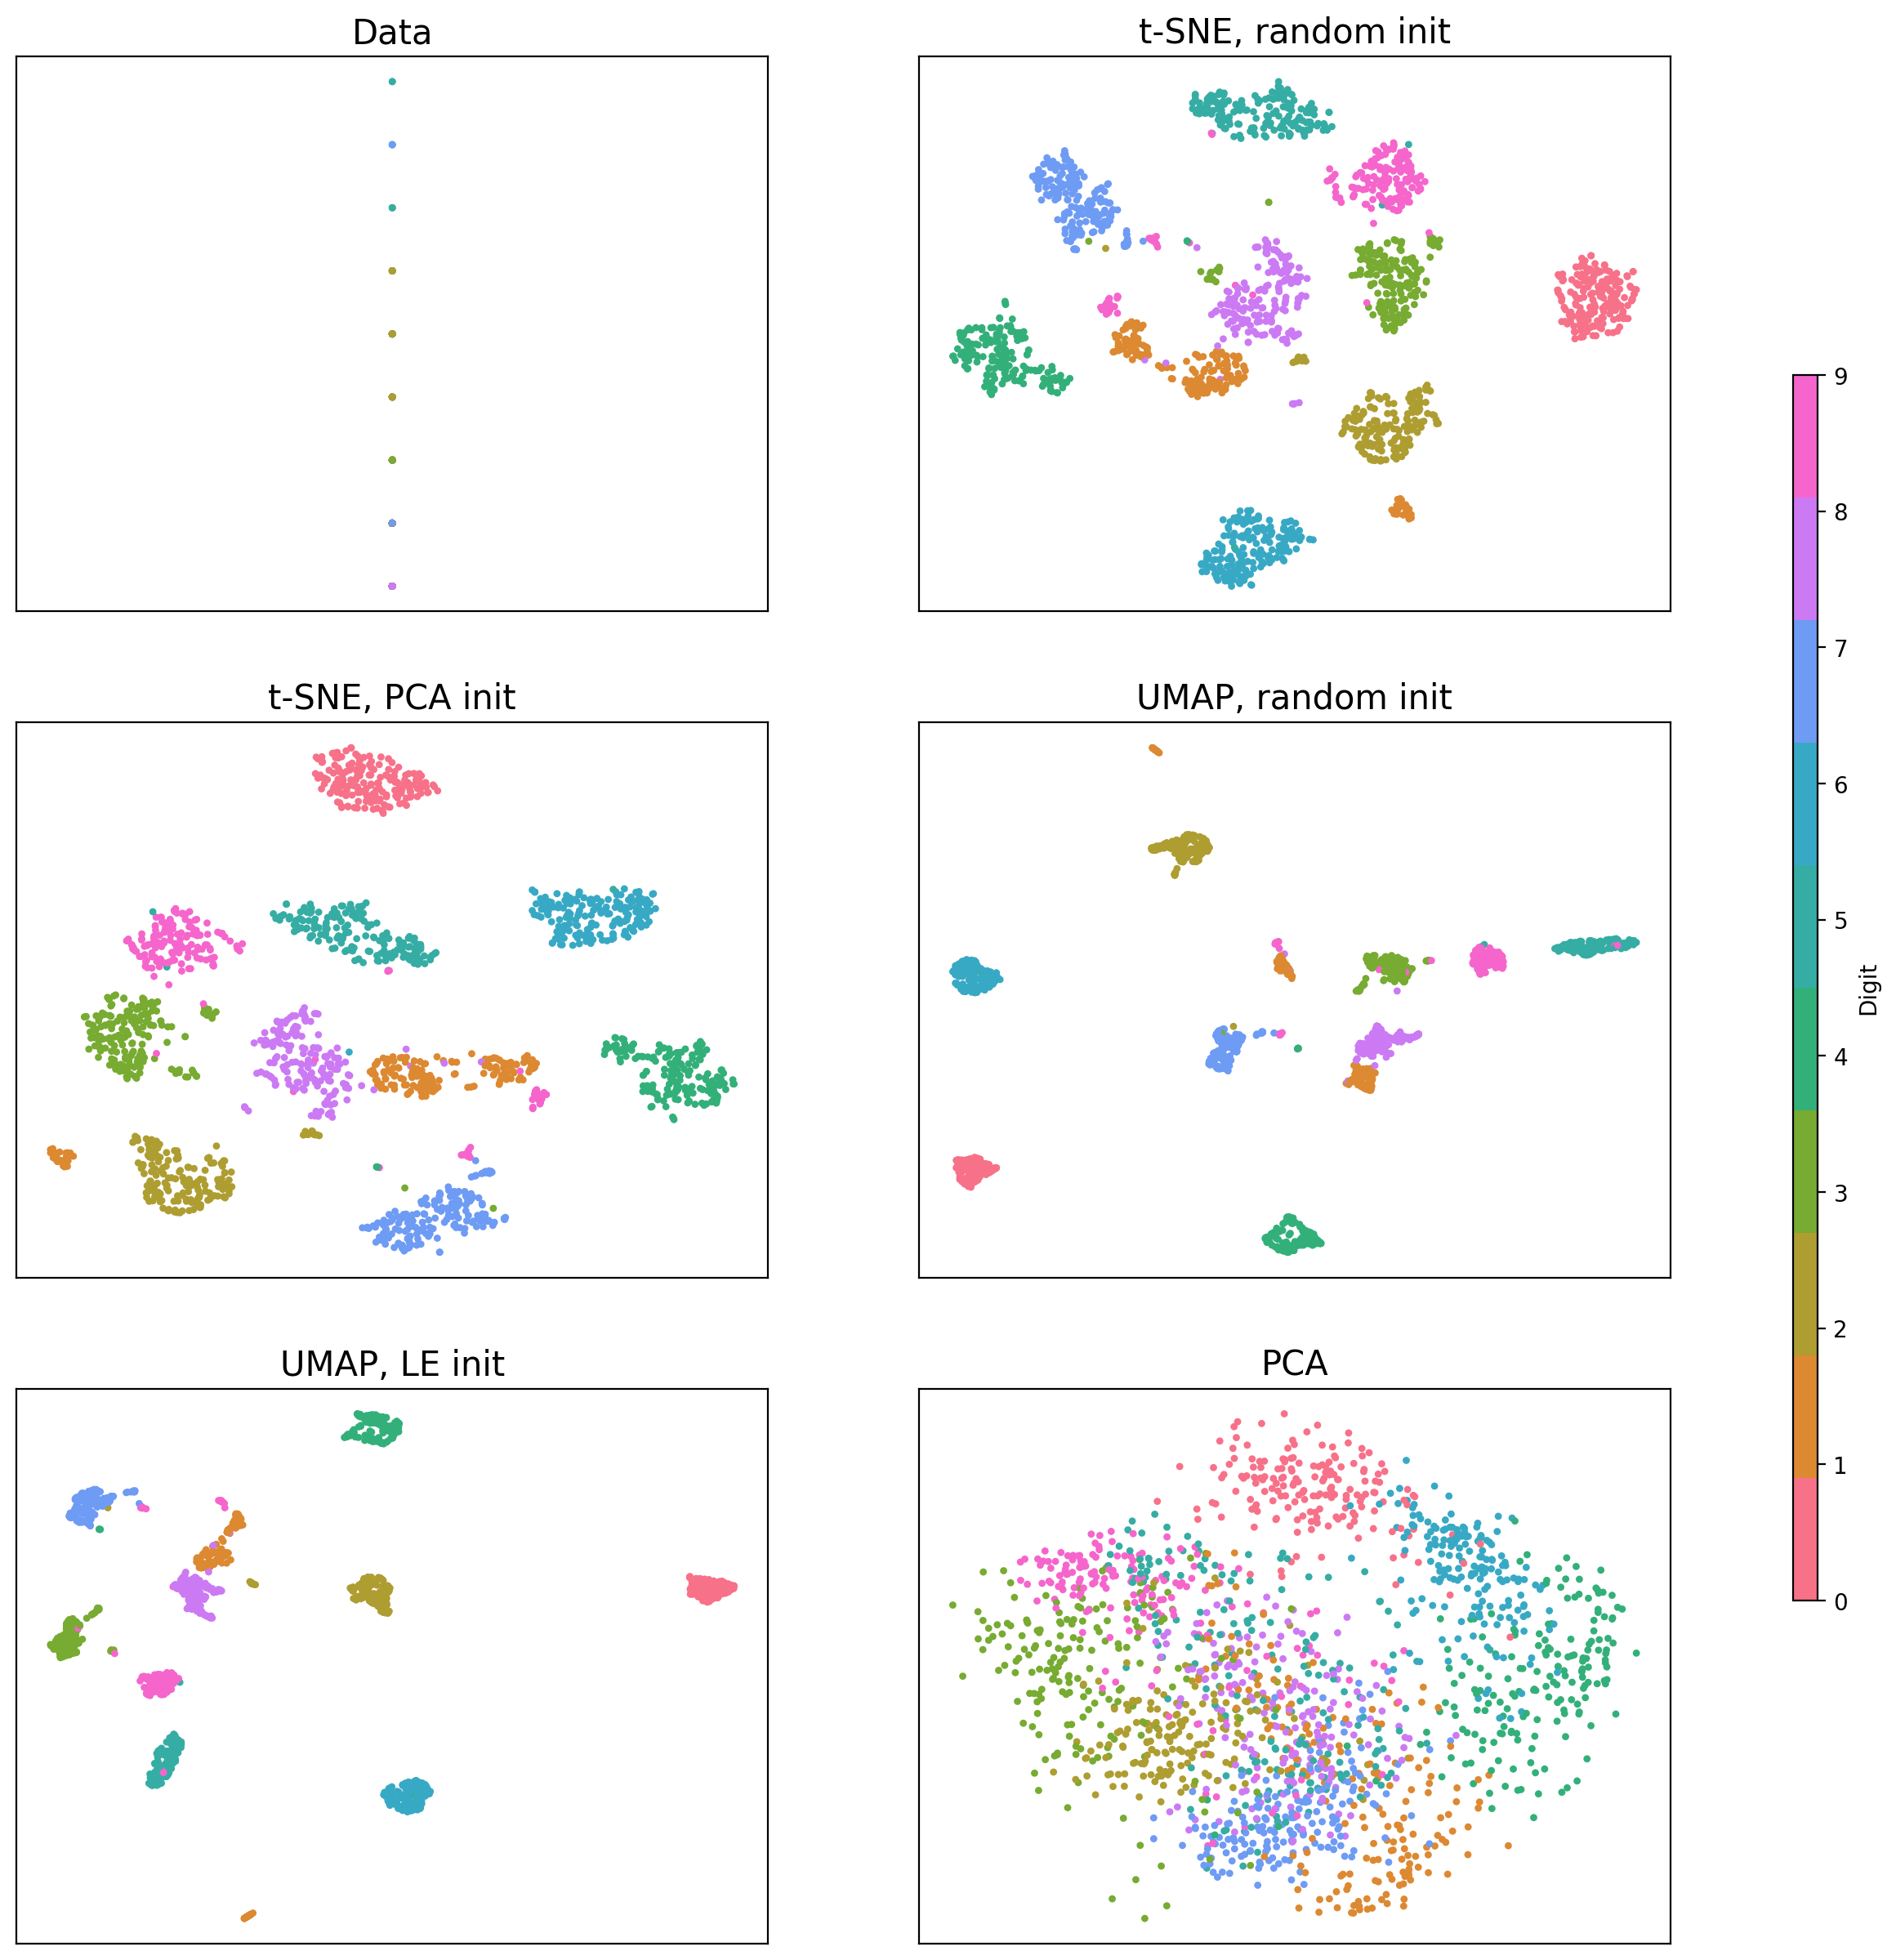

In [18]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init',
          'UMAP, random init', 'UMAP, LE init', 'PCA']

fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5],0):
    im = ax[i].scatter(Z[:,0], Z[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i], fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.5], label='digit')
cbar = fig.colorbar(im, cax=cbar_ax,label='Digit')